# College Basketball Analysis

This project explores NCAA college basketball team statistics from a recent season using **pandas**, **numpy**, and **seaborn**. It answers questions about team performance, efficiency, and rankings to showcase fundamental data analysis skills.


In [23]:
# Import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load the dataset

basketballData = pd.read_excel('../Data/CollegeBasketball.xlsx')
basketballData.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG%,EFGD%,TOR,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,Houston,B12,34,30,119.2,85.5,0.9785,49.7,44.0,13.7,...,29.9,39.0,48.4,43.4,34.7,30.0,63.3,10.6,S16,1.0
1,Connecticut,BE,34,31,127.1,93.6,0.9712,57.1,45.1,14.9,...,33.3,32.5,58.5,43.7,36.7,31.9,64.6,11.3,Champions,1.0
2,Purdue,B10,33,29,126.2,94.7,0.9644,56.0,47.7,16.5,...,42.8,23.0,53.2,48.1,40.8,31.4,67.6,11.0,2ND,1.0
3,North Carolina,ACC,34,27,116.8,93.2,0.9305,51.3,46.4,14.4,...,36.8,28.3,50.3,46.0,35.4,31.4,70.4,6.6,S16,1.0
4,Iowa St.,B12,34,27,113.6,86.5,0.9583,51.9,47.1,15.7,...,36.1,35.2,51.7,46.9,34.9,31.5,67.6,6.9,S16,2.0


# Data Exploration

In [ ]:
# What are the column names in the dataset?
basketballData.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG%', 'EFGD%',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED'],
      dtype='object')

In [11]:
# How many rows and columns are in the dataset?
basketballData.shape

(725, 23)

In [14]:
# What are the data types of each column?
basketballData.dtypes

TEAM           object
CONF           object
G               int64
W               int64
ADJOE         float64
ADJDE         float64
BARTHAG       float64
EFG%          float64
EFGD%         float64
TOR           float64
TORD          float64
ORB           float64
DRB           float64
FTR           float64
FTRD          float64
2P_O          float64
2P_D          float64
3P_O          float64
3P_D          float64
ADJ_T         float64
WAB           float64
POSTSEASON     object
SEED          float64
dtype: object

In [16]:
# Verify if there are any missing values in the dataset
basketballData.isnull().sum()

TEAM            0
CONF            0
G               0
W               0
ADJOE           0
ADJDE           0
BARTHAG         0
EFG%            0
EFGD%           0
TOR             0
TORD            0
ORB             0
DRB             0
FTR             0
FTRD            0
2P_O            0
2P_D            0
3P_O            0
3P_D            0
ADJ_T           0
WAB             0
POSTSEASON    589
SEED          589
dtype: int64

In [17]:
basketballData.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG%,EFGD%,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED
count,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,136.000000
mean,31.227586,17.008276,104.652276,104.652414,0.493570,50.369517,50.517931,17.693517,17.639172,28.620276,28.795862,32.287310,32.455862,50.190207,50.294897,33.797655,33.930207,67.310897,-8.056097,8.779412
std,2.271444,6.009195,7.148313,6.108328,0.252749,2.880520,2.545971,2.081197,2.359022,4.031158,2.912378,4.672694,5.445335,3.289986,2.886335,2.418862,2.170797,2.470434,6.864529,4.675692
min,21.000000,1.000000,85.100000,85.500000,0.028300,41.000000,41.300000,12.000000,11.200000,17.000000,20.200000,20.900000,16.200000,40.400000,40.800000,24.700000,26.500000,58.700000,-24.800000,1.000000
25%,30.000000,13.000000,99.700000,100.300000,0.276200,48.600000,48.900000,16.300000,16.100000,25.900000,26.700000,29.100000,28.500000,48.100000,48.400000,32.200000,32.500000,65.700000,-13.000000,5.000000
50%,31.000000,17.000000,104.100000,104.900000,0.465500,50.600000,50.500000,17.700000,17.400000,28.600000,28.800000,32.000000,31.800000,50.200000,50.400000,33.800000,34.000000,67.200000,-8.800000,9.000000
75%,33.000000,21.000000,109.500000,109.400000,0.728800,52.100000,52.200000,18.900000,18.900000,31.500000,30.700000,35.200000,35.700000,52.200000,52.200000,35.600000,35.400000,68.900000,-3.100000,13.000000
max,39.000000,35.000000,127.100000,120.700000,0.978500,59.900000,58.200000,24.000000,26.000000,41.900000,38.600000,50.000000,51.400000,62.000000,59.000000,41.200000,41.000000,75.100000,11.300000,16.000000


G – Games Played
W – Wins
ADJOE – Adjusted Offensive Efficiency
ADJDE – Adjusted Defensive Efficiency
BARTHAG – Overall team strength estimate

# Answering Questions

In [20]:
# Which team won the season?
champion = basketballData[basketballData['POSTSEASON'] == 'Champions']
champion[['TEAM', 'CONF', 'W', 'BARTHAG', 'SEED']]

,TEAM,CONF,W,BARTHAG,SEED
1,Connecticut,BE,31,0.9712,1.0
374,Connecticut,BE,31,0.9643,4.0


Using this filter you can look at the champion of the season and a summary of who they were and how strong they are 

In [ ]:
# Which team had the best offensive rating?
# ADJOE (Adjusted Offensive Efficiency)
bestOffense = basketballData.sort_values(by='ADJOE', ascending=False).head(5)
bestOffense[['TEAM', 'CONF', 'ADJOE', 'W', 'POSTSEASON']]



,TEAM,CONF,ADJOE,W,POSTSEASON
1,Connecticut,BE,127.1,31,Champions
2,Purdue,B10,126.2,29,2ND
9,Illinois,B10,125.3,26,E8
14,Alabama,SEC,125.2,21,F4
371,Gonzaga,WCC,123.2,31,E8


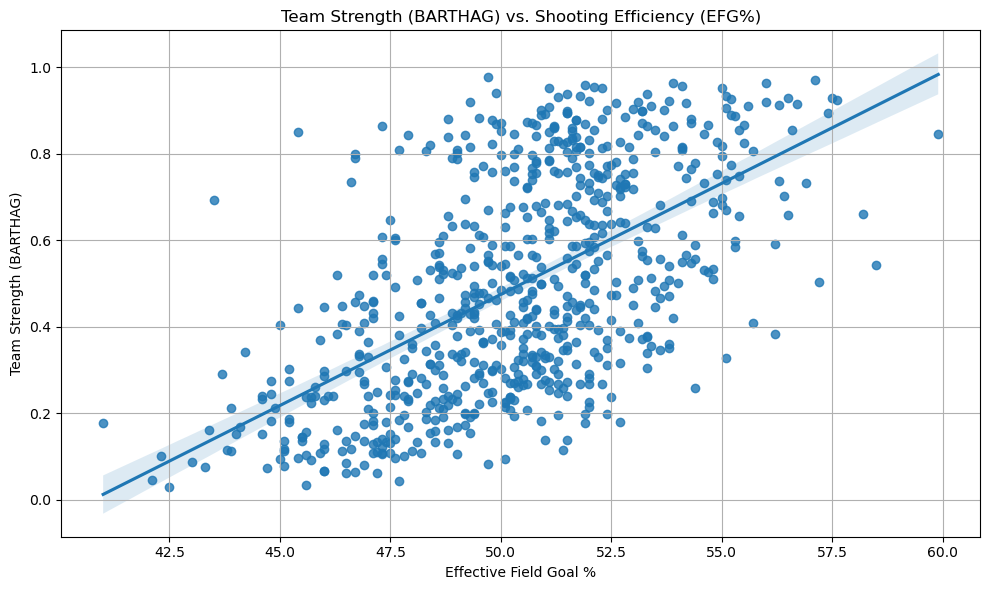

In [24]:
#  Is there a relationship between team strength and shooting accuracy?
# BARTHAG (strength)
# EFG% (Effective Field Goal %)

plt.figure(figsize=(10,6))
sns.regplot(data=basketballData, x='EFG%', y='BARTHAG')
plt.title('Team Strength (BARTHAG) vs. Shooting Efficiency (EFG%)')
plt.xlabel('Effective Field Goal %')
plt.ylabel('Team Strength (BARTHAG)')
plt.grid(True)
plt.tight_layout()

Based on the graph we can determine there is a positive trend in the plot. The upward slope of the regression line shows a strong positive correlation between a team sooting accuracy and its overall strength.

#### Seaborn.viollin
It shows the distribution of data points after grouping by one (or more) variables. 

This violin plot compares the distribution of team strength (BARTHAG) across all NCAA conferences. Each violin represents the range, density, and central tendency of team strength within a specific conference.

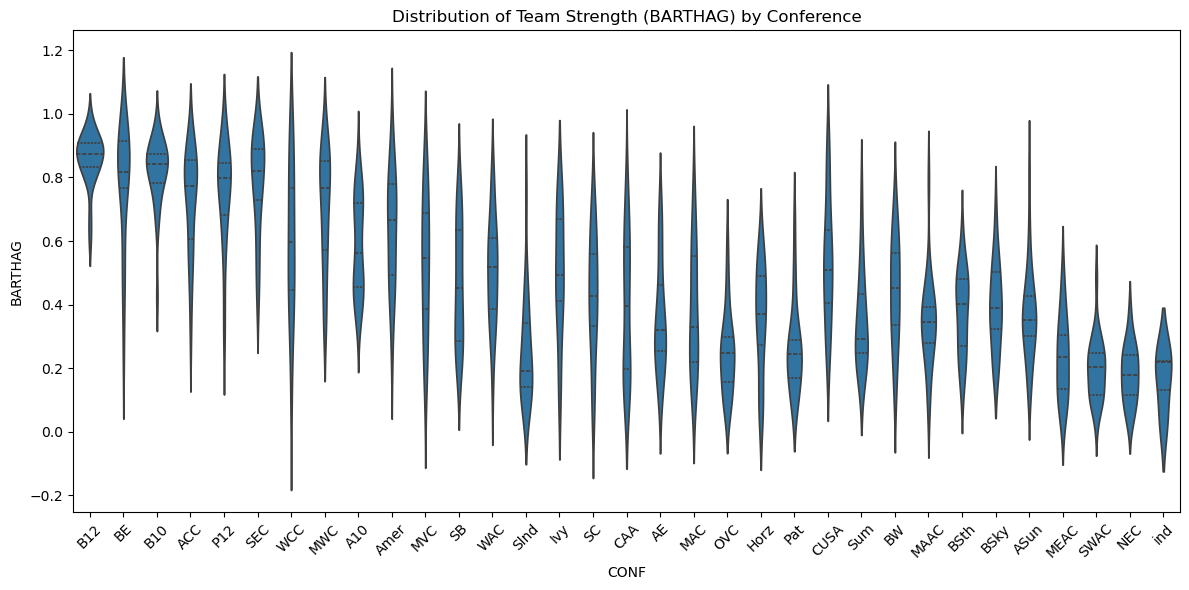

In [26]:
plt.figure(figsize=(12,6))
sns.violinplot(data=basketballData, x='CONF', y='BARTHAG', inner='quartile')
plt.xticks(rotation=45)
plt.title('Distribution of Team Strength (BARTHAG) by Conference')
plt.tight_layout()
plt.show()
